<a href="https://colab.research.google.com/github/NeelSagar39/Covid-19_analysis/blob/main/Experiment-2(classification).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import csv, urllib.request
import numpy as np
import pandas as pd
data = []
for i in range(3,21):
  url = 'https://api.covid19india.org/csv/latest/raw_data'+str(i)+'.csv'
  response = urllib.request.urlopen(url)
  lines = [l.decode('utf-8') for l in response.readlines()]
  cr = csv.reader(lines)
  for row in cr:
      #print(row)
      data.append(row)
  
data = pd.DataFrame(data[1::],columns=data[0])
print(data.iloc[0])

Entry_ID                                                   1
State Patient Number                                        
Date Announced                                    27/04/2020
Age Bracket                                                 
Gender                                                      
Detected City                                               
Detected District                                           
Detected State                                   West Bengal
State code                                                WB
Num Cases                                                 38
Current Status                                  Hospitalized
Contracted from which Patient (Suspected)                   
Notes                                        Details awaited
Source_1                                        mohfw.gov.in
Source_2                                                    
Source_3                                                    
Nationality             

In [53]:
data.columns = data.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
data = data[data.gender!='']
data = data[data.gender!='Non-Binary']
data = data[data.gender!='Gender']
data = data[data.gender!='NA']
data = data[data.gender!='M ']
data = data[data.gender!='M,']
data = data[data.gender!='Femal e']
data = data[data.current_status!='Migrated_Other']
data1 = data.drop(
    columns=["contracted_from_which_patient_suspected","notes","source_1","source_2","source_3","state_patient_number","entry_id",
             "date_announced","detected_district","detected_city","num_cases","type_of_transmission","nationality","patient_number",
             "status_change_date","state_code"
    ]
)
data1 = data1.replace('Hospitalized','Recovered')
data1['age_bracket'] = pd.to_numeric(data1['age_bracket'],errors='coerce')
data1['age_bracket'] = data1[data1.age_bracket!='Nan']
print(data1)


       age_bracket gender detected_state current_status
3               28      M      Rajasthan       Deceased
9               15      F          Bihar      Recovered
10              55      F         Odisha      Recovered
11              22      F         Odisha      Recovered
12              23      F         Odisha      Recovered
...            ...    ...            ...            ...
427211          75      M         Odisha       Deceased
427212          78      F         Odisha       Deceased
427478          57      M     Chandigarh       Deceased
428258          76      M        Manipur       Deceased
428259          75      M        Manipur       Deceased

[114069 rows x 4 columns]


In [54]:
def gender_encode():
  from sklearn.preprocessing import LabelEncoder
  print(data1['gender'].unique())
  labelencoder = LabelEncoder()
  data1['gender'] = labelencoder.fit_transform(data1['gender'])
  print(data1['gender'].unique())
def state_encode():
  from sklearn.preprocessing import LabelEncoder
  labelencoder = LabelEncoder()
  print(data1['detected_state'].unique())
  data1['detected_state'] = labelencoder.fit_transform(data1['detected_state'])
  print(data1['detected_state'].unique())
def status_encode():
  from sklearn.preprocessing import LabelEncoder
  print(data1['current_status'].unique())
  labelencoder = LabelEncoder()
  data1['current_status'] = labelencoder.fit_transform(data1['current_status'])
  print(data1['current_status'].unique())

gender_encode()
state_encode()
status_encode()
X = data1[['age_bracket','gender','detected_state']]
X1 = X.iloc[:,0]
X2 = X.iloc[:,1]
X3 = X.iloc[:,2]
y = np.array(data1[['current_status']])
print(data1.iloc[9])

['M' 'F']
[1 0]
['Rajasthan' 'Bihar' 'Odisha' 'Karnataka' 'Punjab' 'Kerala' 'Chandigarh'
 'Tamil Nadu' 'Gujarat' 'Assam' 'Maharashtra' 'Jammu and Kashmir'
 'Chhattisgarh' 'Haryana' 'Uttar Pradesh' 'Telangana' 'Uttarakhand'
 'Delhi' 'Dadra and Nagar Haveli and Daman and Diu' 'Himachal Pradesh'
 'Mizoram' 'West Bengal' 'Jharkhand' 'Manipur' 'Puducherry'
 'Arunachal Pradesh' 'Nagaland' 'Sikkim' 'Andaman and Nicobar Islands'
 'Goa' 'Meghalaya']
[24  3 21 14 23 15  4 26  9  2 16 12  5 10 28 27 29  7  6 11 19 30 13 17
 22  1 20 25  0  8 18]
['Deceased' 'Recovered']
[0 1]
age_bracket       17
gender             0
detected_state     3
current_status     1
Name: 100, dtype: object


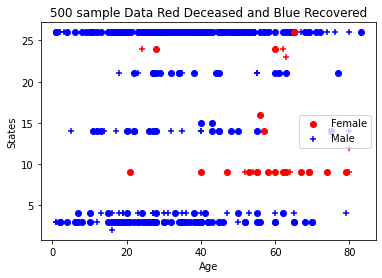

In [20]:
import matplotlib.pyplot as plt

def plotter(X1,X2,X3,Y):
  fig = plt.figure()
  #ax = fig.add_subplot(111, projection='3d')

  x = np.array(X1)[:500]
  y = np.array(X3)[:500]
  z = np.array(X2)[:500]
  c = Y[:500]
  for i in range(0,len(y)):
    if Y[i]==0 and z[i]==0:
      #print('help')
      dm = plt.scatter(x[i],y[i],c='red',marker='+') 
    elif Y[i]==1 and z[i]==0:
      am = plt.scatter(x[i],y[i],c='blue',marker='+') 
    elif Y[i]==0 and z[i]==1:
      df = plt.scatter(x[i],y[i],c='red',marker='o') 
    elif Y[i]==1 and z[i]==1:
      af = plt.scatter(x[i],y[i],c='blue',marker='o')
  plt.xlabel('Age') 
  plt.ylabel('States') 
  plt.legend((dm,am,df,af),('Deceased Male','Recovered Male','Deceased Female','Recovered Female'))
  plt.title('500 sample Data')
  #img = ax.scatter(x, y, z,c=c,cmap='bwr')
  #fig.colorbar(img)
  plt.show()
plotter(X1,X2,X3,y)

In [57]:
X = np.column_stack((X1,X2,X3))
X = np.array(X, dtype=np.float64)
X = np.nan_to_num(X)
y = np.ravel(y)
print(np.unique(pd.isna(X)))
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X,y)
neigh.get_params

[False]


<bound method BaseEstimator.get_params of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')>

when n = 2 Mean Accuracy = 0.8670512756601536 Std = 0.11685092148003776
when n = 4 Mean Accuracy = 0.8982684509717686 Std = 0.14101990320151833
when n = 6 Mean Accuracy = 0.9036768792864022 Std = 0.16166538450862397
when n = 8 Mean Accuracy = 0.9050180602701555 Std = 0.16598504399551878
when n = 10 Mean Accuracy = 0.9061399722855373 Std = 0.1740456386324229
when n = 20 Mean Accuracy = 0.9066830093669239 Std = 0.19232909118183455
when n = 50 Mean Accuracy = 0.9106015912504605 Std = 0.19592024958462476
when n = 100 Mean Accuracy = 0.9033860153148485 Std = 0.22036107721155557
when n = 200 Mean Accuracy = 0.9036490117205641 Std = 0.2204310310841706
when n = 500 Mean Accuracy = 0.9014135422719798 Std = 0.21967076330311192


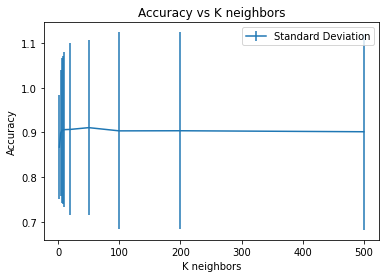

In [37]:
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

K_fold = 10
def Knn_function(N, K_fold,X_array,Y):
  mean_array=[]
  x = X_array 
  std_array=[]
  fold = K_fold
  for n in N:
    small_array=[]
    kf = KFold(n_splits=fold)
    for train, test in kf.split(x):
      from sklearn.neighbors import KNeighborsClassifier
      model = KNeighborsClassifier(n_neighbors = n).fit(x[train], Y[train])
      ypred = model.predict(x[test])
      #scores = cross_val_score(model, x[test], y[test], cv=5, scoring='roc_auc')
      #scores = f1_score(y[test],ypred)
      #scores = roc_auc_score(y[test],ypred)
      scores = model.score(x[test],y[test])
      small_array.append(scores)
    mean_array.append(np.array(small_array).mean())
    std_array.append(np.array(small_array).std())
    print("when n = "+ str(n)+" Mean Accuracy = "+str(np.array(small_array).mean())+" Std = "+str(np.array(small_array).std()))
  return mean_array,std_array
mean_array2,std_array2 = Knn_function([2,4,6,8,10,20,50,100,200,500], K_fold, X,y)
plt.errorbar([2,4,6,8,10,20,50,100,200,500],mean_array2,yerr= std_array2)
plt.xlabel('K neighbors')
plt.ylabel('Accuracy')
plt.legend(['Standard Deviation'])
plt.title('Accuracy vs K neighbors')
plt.savefig('Knn.png')
plt.show()

when c = 1e-06 Mean Accuracy = 0.903868175391994 Std = 0.22050200443340717
when c = 1e-05 Mean Accuracy = 0.894742200113656 Std = 0.21745170775725584
when c = 0.0001 Mean Accuracy = 0.8920333371347835 Std = 0.21658200387544901
when c = 0.001 Mean Accuracy = 0.8917265079947818 Std = 0.21648050279266512
when c = 0.05 Mean Accuracy = 0.8916037763387811 Std = 0.21644164770983143
when c = 0.1 Mean Accuracy = 0.8916037763387811 Std = 0.21644164770983143


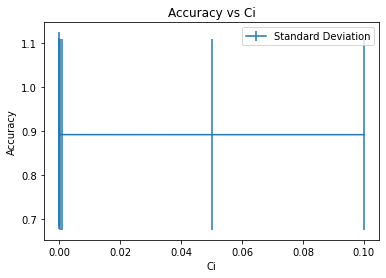

In [38]:
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

K_fold = 10
def Ci_function(C, K_fold,X_array,Y):
  mean_array=[]
  x = X_array 
  std_array=[]
  fold = K_fold
  for c in C:
    small_array=[]
    kf = KFold(n_splits=10)
    for train, test in kf.split(x):
      from sklearn.linear_model import LogisticRegression
      model = LogisticRegression(C=c).fit(x[train], Y[train])
      ypred = model.predict(x[test])
      #scores = f1_score(Y[test],ypred)
      scores = model.score(x[test],Y[test])
      small_array.append(scores)
    mean_array.append(np.array(small_array).mean())
    std_array.append(np.array(small_array).std())
    print("when c = "+ str(c)+" Mean Accuracy = "+str(np.array(small_array).mean())+" Std = "+str(np.array(small_array).std()))
  return mean_array,std_array
C=[0.000001,0.00001,0.0001,0.001,0.05,0.1]
mean_array,std_array = Ci_function(C,K_fold,X,y)
plt.errorbar(C,mean_array,yerr= std_array)
plt.xlabel('Ci')
plt.ylabel('Accuracy')
plt.legend(['Standard Deviation'])
plt.title('Accuracy vs Ci')
plt.savefig('Accuracy.png')
plt.show()

In [44]:
def baseline_model(X):
  return np.ones(X.shape[0])

In [41]:
def predictor(model,X):
  y_pred=[]
  for i in range(0,len(X)):
    pred = model.predict(X[i].reshape(1,-1))
    y_pred.append(pred)
  return y_pred

In [46]:
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
Knn = KNeighborsClassifier(n_neighbors = 50).fit(X, y) 
logistic_model = LogisticRegression(C=0.001).fit(X,y)
Logi_y_pred = predictor(logistic_model, X)
Knn_y_pred = predictor(Knn, X)
baseline_y_pred = baseline_model(X)
confusion_matrix2 = confusion_matrix(y,Knn_y_pred)
confusion_matrix3 = confusion_matrix(y,baseline_y_pred)
confusion_matrix1 = confusion_matrix(y,Logi_y_pred)

In [47]:
tn1, fp1, fn1, tp1 = confusion_matrix1.ravel()
print('For Logistic Regression: Number of True Negatives: ',tn1,' False Positives: ',fp1,' False Negatives: ',fn1,' True Positives : ',tp1)

For Logistic Regression: Number of True Negatives:  1234  False Positives:  9522  False Negatives:  1267  True Positives :  102046


In [48]:
tn2, fp2, fn2, tp2 = confusion_matrix2.ravel()
print('For Knn: Number of True Negatives: ',tn2,' False Positives: ',fp2,' False Negatives: ',fn2,' True Positives : ',tp2)

For Knn: Number of True Negatives:  3831  False Positives:  6925  False Negatives:  247  True Positives :  103066


In [50]:
tn, fp, fn, tp = confusion_matrix3.ravel()
print('For Baseline Model: Number of True Negatives: ',tn,' False Positives: ',fp,' False Negatives: ',fn,' True Positives : ',tp)

For Baseline Model: Number of True Negatives:  0  False Positives:  10756  False Negatives:  0  True Positives :  103313


Text(0.5, 1.0, 'Roc Curve')

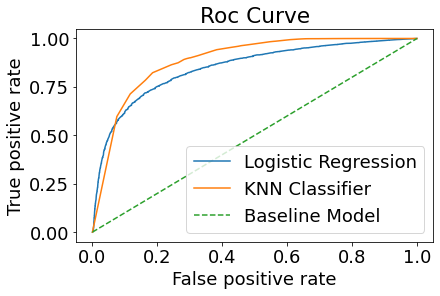

In [59]:
from sklearn.metrics import roc_curve
False_Positive_rate,True_Positive_rate,_ = roc_curve(y,logistic_model.decision_function(X))
False_Positive_rate2,True_Positive_rate2,_ = roc_curve(y,Knn.predict_proba(X)[:,1])
False_Positive_rate3,True_Positive_rate3,_ = roc_curve(y,baseline_y_pred)

plt.plot(False_Positive_rate,True_Positive_rate)
plt.plot(False_Positive_rate2,True_Positive_rate2)
plt.plot(False_Positive_rate3,True_Positive_rate3,linestyle='--')
plt.rc('font', size=18); plt.rcParams['figure.constrained_layout.use'] = True
plt.xlabel('False positive rate') 
plt.ylabel('True positive rate') 
plt.legend(['Logistic Regression','KNN Classifier', 'Baseline Model'])
plt.title('Roc Curve')